# Курсовая работа

## Описание датасета

Эта база данных содержит 76 атрибутов, но во всех опубликованных экспериментах упоминается подмножество из 14 из них. В частности, база данных Кливленда является единственной, которая использовалась исследователями ОМ до настоящего времени. Поле «target» относится к наличию болезни сердца у пациента. 

- Age - возраст в годах <br>
- Sex (1 = male; 0 = female)-пол<br>
- CP (chest pain type) - тип боли в груди<br>
- TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))- артериальное давление в покое (в мм рт. ст. при поступлении в больницу)<br>
- CHOL (serum cholestoral in mg/dl)-холестерин в мг / дл <br>
- FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) -уровень сахара в крови натощак> 120 мг / дл<br>
- RESTECH (resting electrocardiographic results) - результаты электрокардиографии в покое<br>
- THALACH (maximum heart rate achieved) - достигнута максимальная частота сердечных сокращений<br>
- EXANG (exercise induced angina (1 = yes; 0 = no)) - стенокардия, вызванная физической нагрузкой<br>
- OLDPEAK (ST depression induced by exercise relative to rest) - Депрессия ST, вызванная физическими упражнениями относительно отдыха<br>
- SLOPE (the slope of the peak exercise ST segment) - наклон пика упражнений сегмента ST<br>
- CA (number of major vessels (0-3) colored by flourosopy) - количество крупных сосудов (0-3), окрашенных по цвету<br>
- THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)<br>
- TARGET (1 or 0) - заболевание<br>


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, RepeatedKFold, ShuffleSplit, StratifiedKFold
from sklearn.model_selection import learning_curve, validation_curve

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Загружаем данные и выводим первые 5 строк

In [3]:
data=pd.read_csv("/Users/user/Desktop/data2.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Информация о данных

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


Посмотрим заполненность датасета. Возможно есть пропуски.

In [5]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Функции, описанные в приведенном выше наборе данных:

1. Count сообщает нам количество пустых строк в объекте.

2. Среднее говорит нам о среднем значении этой функции.

3. Стандарт сообщает нам значение стандартного отклонения этой функции.

4. Мин говорит нам минимальное значение этой функции.

5. 25%, 50% и 75% - процентиль / квартиль каждой характеристики.

6. Макс сообщает нам максимальное значение этой функции.

### Рассмотрим фичи

1.Sex

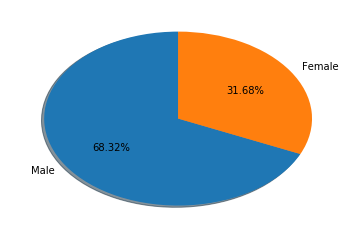

In [7]:
male = len(data[data.sex == 1])
female = len(data[data.sex == 0])
plt.pie(x=[male, female], explode=(0, 0), labels=['Male', 'Female'], autopct='%1.2f%%', shadow=True, startangle=90)
plt.show()

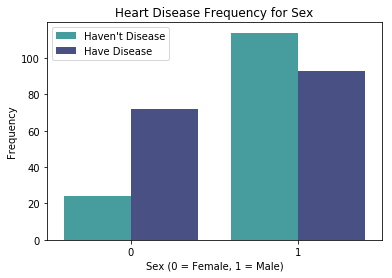

In [8]:
sns.countplot('sex',hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

2.CP (chest pain type)

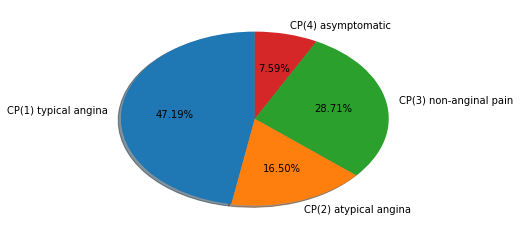

In [9]:
x = [len(data[data['cp'] == 0]),len(data[data['cp'] == 1]), len(data[data['cp'] == 2]), len(data[data['cp'] == 3])]
plt.pie(x, data=data, labels=['CP(1) typical angina', 'CP(2) atypical angina', 'CP(3) non-anginal pain', 'CP(4) asymptomatic'], autopct='%1.2f%%', shadow=True,startangle=90)
plt.show()

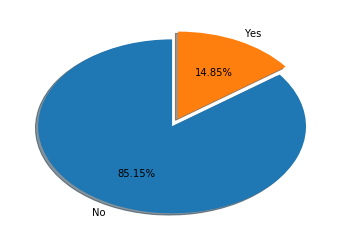

In [10]:
sizes = [len(data[data.fbs == 0]), len(data[data.fbs==1])]
labels = ['No', 'Yes']
plt.pie(x=sizes, labels=labels, explode=(0.1, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

3.FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

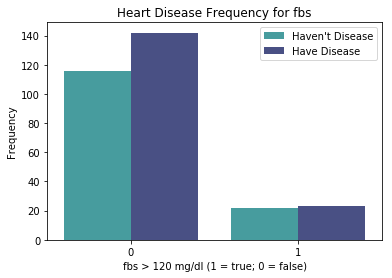

In [11]:
sns.countplot('fbs', hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for fbs')
plt.xticks(rotation=0)
plt.xlabel('fbs > 120 mg/dl (1 = true; 0 = false)')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

3.restecg (resting electrocardiographic results)

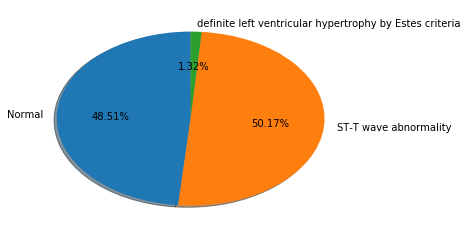

In [12]:
sizes = [len(data[data.restecg == 0]), len(data[data.restecg==1]), len(data[data.restecg==2])]
labels = ['Normal', 'ST-T wave abnormality', 'definite left ventricular hypertrophy by Estes criteria']
plt.pie(x=sizes, labels=labels, explode=(0, 0, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

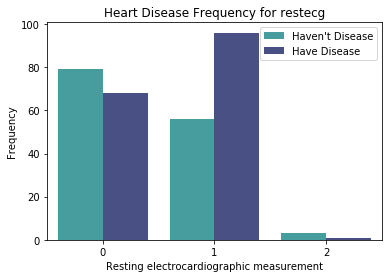

In [13]:
sns.countplot('restecg', hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for restecg')
plt.xlabel('Resting electrocardiographic measurement')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

4.exang (exercise induced angina)

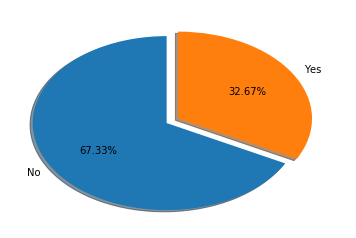

In [14]:
sizes = [len(data[data.exang == 0]), len(data[data.exang==1])]
labels = ['No', 'Yes']
plt.pie(x=sizes, labels=labels, explode=(0.1, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

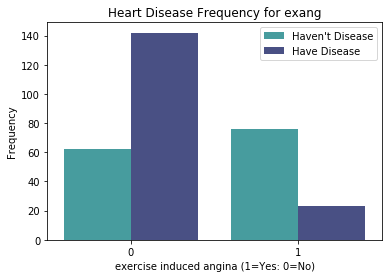

In [15]:
sns.countplot('exang', hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for exang')
plt.xlabel('exercise induced angina (1=Yes: 0=No)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

5.Slope : The slope of the peak exercise ST segment

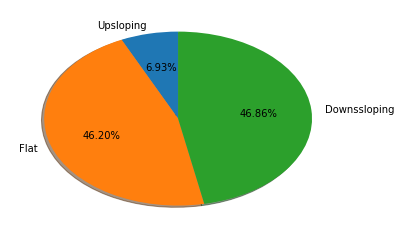

In [16]:
sizes = [len(data[data.slope == 0]), len(data[data.slope==1]), len(data[data.slope==2])]
labels = ['Upsloping', 'Flat', 'Downssloping']
plt.pie(x=sizes, labels=labels, explode=(0, 0, 0), autopct="%1.2f%%", startangle=90,shadow=True)
plt.show()

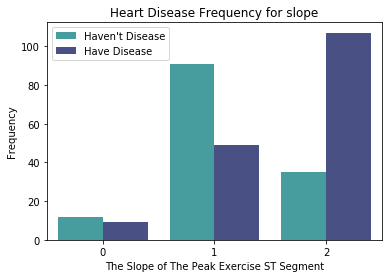

In [17]:
sns.countplot('slope', hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for slope')
plt.xlabel('The Slope of The Peak Exercise ST Segment')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

6.thal : A blood disorder called thalassemia

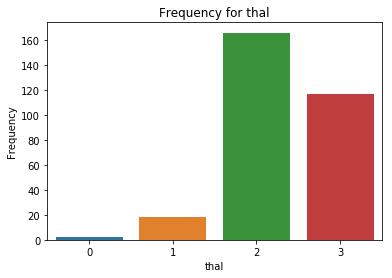

In [18]:
sns.countplot('thal', data=data)
plt.title('Frequency for thal')
plt.ylabel('Frequency')
plt.show()

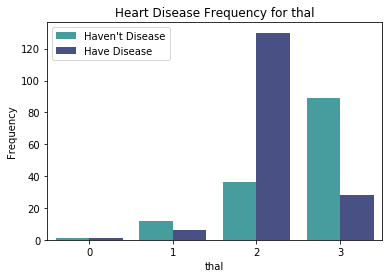

In [19]:
sns.countplot('thal', hue='target', data=data, palette='mako_r')
plt.title('Heart Disease Frequency for thal')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

7.Age

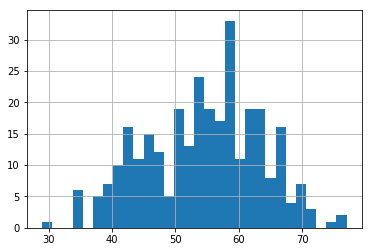

In [20]:
data.age.hist(bins=30)
plt.show()

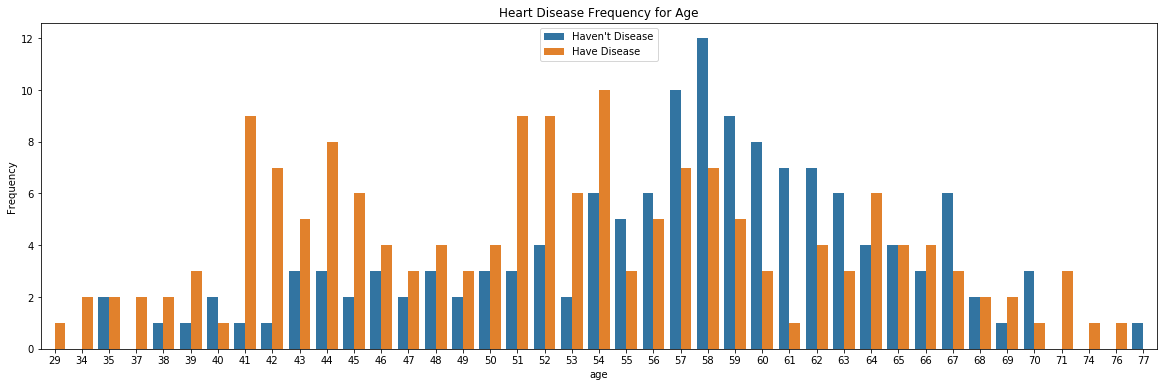

In [21]:
plt.figure(figsize=(20, 6))
sns.countplot('age', hue='target', data=data)
plt.title('Heart Disease Frequency for Age')
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

8.Chol : serum cholestoral in mg/dl

[]

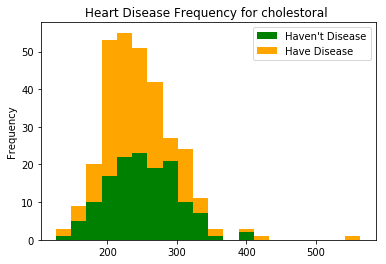

In [22]:
plt.hist([data.chol[data.target==0], data.chol[data.target==1]], bins=20,color=['green', 'orange'], stacked=True)
plt.legend(["Haven't Disease", "Have Disease"])
plt.title('Heart Disease Frequency for cholestoral ')
plt.ylabel('Frequency')
plt.plot()

9.thalach : maximum heart rate achieved

[]

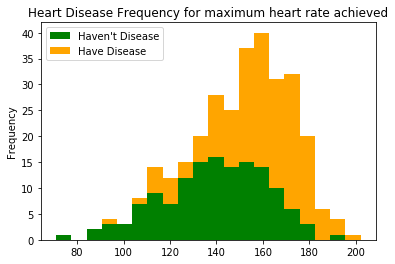

In [23]:
plt.hist([data.thalach[data.target==0], data.thalach[data.target==1]], bins=20,color=['green', 'orange'], stacked=True)
plt.legend(["Haven't Disease", "Have Disease"])
plt.title('Heart Disease Frequency for maximum heart rate achieved')
plt.ylabel('Frequency')
plt.plot()

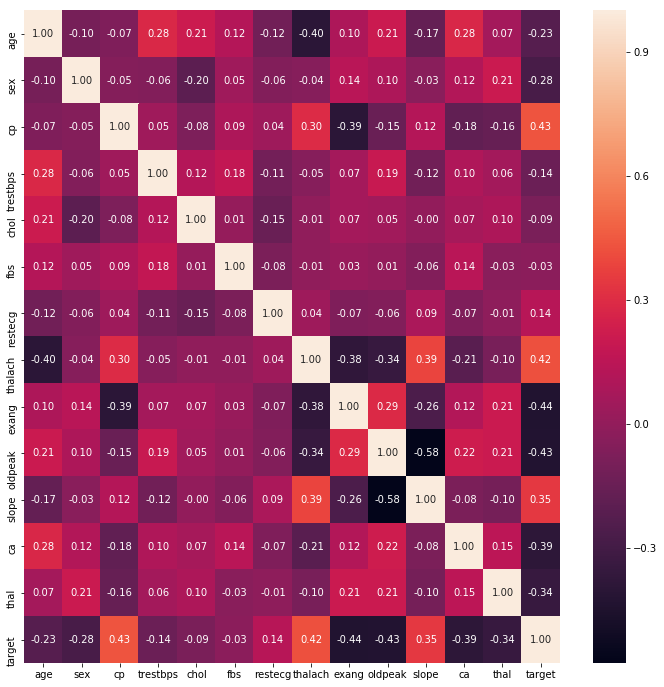

In [24]:
plt.figure(figsize=(12, 12))
sns.heatmap(data.corr(), annot=True, fmt='.2f')
plt.show()

In [25]:
target = data['target']
data = data.drop('target', axis = 1)

In [26]:
#деление на тестовую и обучающую выборку
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.2, random_state=1)

In [27]:
#Стохастический градиентный спуск
sgd = SGDClassifier().fit(X_train, y_train)

In [28]:
#SVM
svm_svc = SVC(gamma='auto').fit(X_train, y_train)

In [29]:
#Decision tree
decision_tree = DecisionTreeClassifier(random_state=1, max_depth=0.75).fit(X_train, y_train)

In [33]:
target_sgd = sgd.predict(X_test)
sgd_inf = []
sgd_inf = [accuracy_score(y_test, target_sgd), precision_score(y_test, target_sgd), recall_score(y_test, target_sgd)]
accuracy_score(y_test, target_sgd), \
precision_score(y_test, target_sgd),  \
recall_score(y_test, target_sgd)

(0.6065573770491803, 0.6129032258064516, 0.6129032258064516)

In [46]:
target_svm_svc = svm_svc.predict(X_test)
svm_inf = []
svm_inf = [accuracy_score(y_test, target_svm_svc), precision_score(y_test, target_svm_svc), recall_score(y_test, target_svm_svc)]
accuracy_score(y_test, target_svm_svc), \
precision_score(y_test, target_svm_svc),  \
recall_score(y_test, target_svm_svc)

(0.5081967213114754, 0.5081967213114754, 1.0)

In [35]:
target_decision_tree = decision_tree.predict(X_test)
decision_tree_inf = []
decision_tree_inf = [accuracy_score(y_test, target_decision_tree), precision_score(y_test, target_decision_tree), recall_score(y_test, target_decision_tree)]
accuracy_score(y_test, target_decision_tree), \
precision_score(y_test, target_decision_tree),  \
recall_score(y_test, target_decision_tree)

(0.5081967213114754, 0.5081967213114754, 1.0)

In [98]:
#Подбор гиперпараметра с помошью GridSearchCV и кроссвалидации
scores_sgd = cross_val_score(SGDClassifier(), 
                         X_train, y_train, cv=2)
scores_sgd

array([0.61157025, 0.45454545])

In [99]:
scores_svm_svc = cross_val_score(SVC(gamma='auto'), 
                         X_train, y_train, cv=2)
scores_svm_svc

array([0.55371901, 0.55371901])

In [100]:
scores_decision_tree = cross_val_score(DecisionTreeClassifier(), 
                         X_train, y_train, cv=2)
scores_decision_tree

array([0.80991736, 0.67768595])

In [101]:
parameters = {'alpha':[0.5,0.4,0.3,0.2,0.1]}
clf_gs_sgd = GridSearchCV(SGDClassifier(), parameters, cv=2, scoring='accuracy')
clf_gs_sgd.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.5, 0.4, 0.3, 0.2, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [102]:
parameters = {'gamma':[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]}
clf_gs_svm_svc = GridSearchCV(SVC(), parameters, cv=2, scoring='accuracy')
clf_gs_svm_svc.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [103]:
parameters = {'min_impurity_decrease':[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]}
clf_gs_decision_tree = GridSearchCV(DecisionTreeClassifier(), parameters, cv=2, scoring='accuracy')
clf_gs_decision_tree.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_impurity_decrease': [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [104]:
sgd_new = SGDClassifier(alpha=0.5).fit(X_train, y_train)
svm_svc_new = SVC(gamma=0.1).fit(X_train, y_train)
decision_tree_new = DecisionTreeClassifier(random_state=1, min_impurity_decrease=0.4, max_depth=0.75).fit(X_train, y_train)

In [164]:
target_sgd_new = sgd_new.predict(X_test)
accuracy_score(y_test, target_sgd_new), \
precision_score(y_test, target_sgd_new),  \
recall_score(y_test, target_sgd_new)

(0.6721311475409836, 0.6486486486486487, 0.7741935483870968)

In [165]:
cnf_matrix = confusion_matrix(y_test,target_sgd_new)
cnf_matrix

array([[17, 13],
       [ 7, 24]])

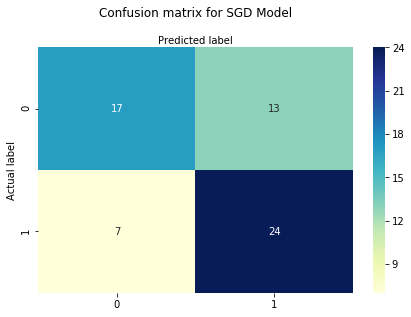

In [166]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for SGD Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [167]:
target_svm_svc_new = svm_svc_new.predict(X_test)
accuracy_score(y_test, target_svm_svc_new), \
precision_score(y_test, target_svm_svc_new),  \
recall_score(y_test, target_svm_svc_new)

(0.5081967213114754, 0.5081967213114754, 1.0)

In [168]:
cnf_matrix = confusion_matrix(y_test,target_svm_svc_new)
cnf_matrix

array([[ 0, 30],
       [ 0, 31]])

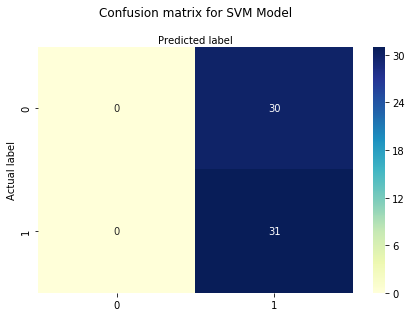

In [169]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for SVM Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [173]:
target_decision_tree_new = decision_tree_new.predict(X_test)
accuracy_score(y_test, target_decision_tree_new), \
precision_score(y_test, target_decision_tree_new),  \
recall_score(y_test, target_decision_tree_new)

(0.5081967213114754, 0.5081967213114754, 1.0)

In [174]:
cnf_matrix = confusion_matrix(y_test,target_decision_tree_new)
cnf_matrix

array([[ 0, 30],
       [ 0, 31]])

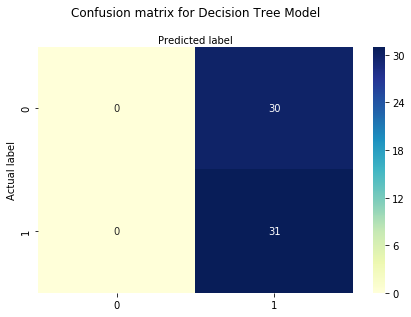

In [175]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Decision Tree Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

## Ассамблевые модели

### Алгоритм случайного леса

In [176]:
random_forest = RandomForestClassifier(n_estimators=10, max_depth=1, random_state=0).fit(X_train, y_train)

In [178]:
target_random_forest = random_forest.predict(X_test)

In [180]:
accuracy_score(y_test, target_random_forest), \
precision_score(y_test, target_random_forest),  \
recall_score(y_test, target_random_forest)

(0.8032786885245902, 0.7567567567567568, 0.9032258064516129)

In [182]:
#Подбираем гиперпараметры
parameters_random_forest = {'n_estimators':[1, 3, 5, 7, 10], 
                            'max_depth':[1, 3, 5, 7, 10],
                            'random_state':[0, 2, 4, 6, 8, 10]}
best_random_forest = GridSearchCV(RandomForestClassifier(), parameters_random_forest, cv=3, scoring='accuracy')
best_random_forest.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 3, 5, 7, 10], 'max_depth': [1, 3, 5, 7, 10], 'random_state': [0, 2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [183]:
GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 3, 5, 7, 10], 'max_depth': [1, 3, 5, 7, 10], 'random_state': [0, 2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 3, 5, 7, 10], 'max_depth': [1, 3, 5, 7, 10], 'random_state': [0, 2, 4, 6, 8, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [185]:
best_random_forest.best_params_

{'max_depth': 3, 'n_estimators': 5, 'random_state': 10}

In [187]:
new_random_forest = RandomForestClassifier(n_estimators=5, max_depth=3, random_state=10).fit(X_train, y_train)

In [189]:
new_target_random_forest = new_random_forest.predict(X_test)

In [191]:
accuracy_score(y_test, new_target_random_forest), \
precision_score(y_test, new_target_random_forest),  \
recall_score(y_test, new_target_random_forest)

(0.7377049180327869, 0.7027027027027027, 0.8387096774193549)

In [193]:
cnf_matrix = confusion_matrix(y_test,new_target_random_forest)
cnf_matrix

array([[19, 11],
       [ 5, 26]])

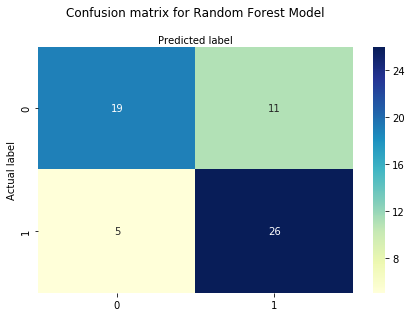

In [194]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Random Forest Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

### Градиентный бустинг

In [177]:
gradient_boosting = GradientBoostingClassifier(n_estimators=10, max_depth=10, learning_rate=0.01).fit(X_train, y_train)

In [179]:
target_gradient_boosting = gradient_boosting.predict(X_test)

In [181]:
accuracy_score(y_test, target_gradient_boosting), \
precision_score(y_test, target_gradient_boosting),  \
recall_score(y_test, target_gradient_boosting)

(0.5081967213114754, 0.5081967213114754, 1.0)

In [184]:
parameters_gradient_boosting = {'n_estimators':[1, 3, 5, 7, 10], 
                            'max_depth':[1, 3, 5, 7, 10],
                            'learning_rate':[0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025]}
best_gradient_boosting = GridSearchCV(GradientBoostingClassifier(), parameters_gradient_boosting, cv=3, scoring='accuracy')
best_gradient_boosting.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [1, 3, 5, 7, 10], 'max_depth': [1, 3, 5, 7, 10], 'learning_rate': [0.001, 0.0025, 0.005, 0.0075, 0.01, 0.025]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [186]:
best_gradient_boosting.best_params_

{'learning_rate': 0.025, 'max_depth': 5, 'n_estimators': 7}

In [188]:
new_gradient_boosting = GradientBoostingClassifier(n_estimators=10, max_depth=3, learning_rate=0.025).fit(X_train, y_train)

In [190]:
new_target_gradient_boosting = new_gradient_boosting.predict(X_test)

In [192]:
accuracy_score(y_test, new_target_gradient_boosting), \
precision_score(y_test, new_target_gradient_boosting),  \
recall_score(y_test, new_target_gradient_boosting)

(0.7377049180327869, 0.6744186046511628, 0.9354838709677419)

In [195]:
cnf_matrix = confusion_matrix(y_test,new_target_gradient_boosting)
cnf_matrix

array([[16, 14],
       [ 2, 29]])

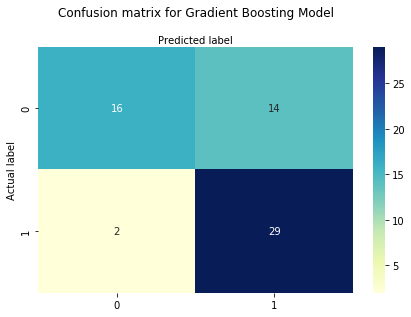

In [197]:
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

#create a heat map
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'YlGnBu',
           fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix for Gradient Boosting Model', y = 1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [202]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

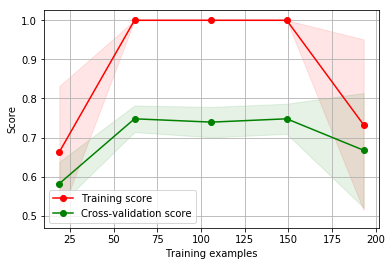

In [206]:
plot_learning_curve(GradientBoostingClassifier(n_estimators=10, max_depth=10, learning_rate=0.01), '', 
                    X_train, y_train, cv=StratifiedKFold(n_splits=5))

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

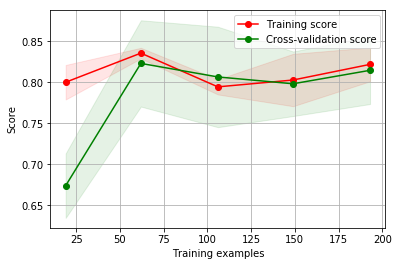

In [207]:
plot_learning_curve(RandomForestClassifier(n_estimators=10, max_depth=1, random_state=0), '', 
                    X_train, y_train, cv=StratifiedKFold(n_splits=5))

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

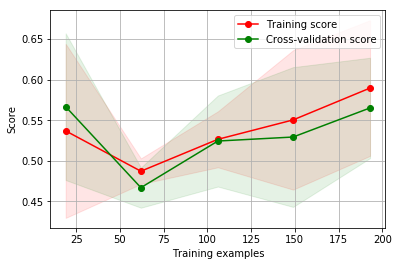

In [208]:
plot_learning_curve(SGDClassifier(), '', X_train, y_train, cv=StratifiedKFold(n_splits=5))

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

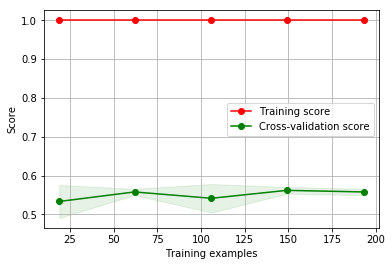

In [209]:
plot_learning_curve(SVC(gamma='auto'), '', X_train, y_train, cv=StratifiedKFold(n_splits=5))

<module 'matplotlib.pyplot' from '/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py'>

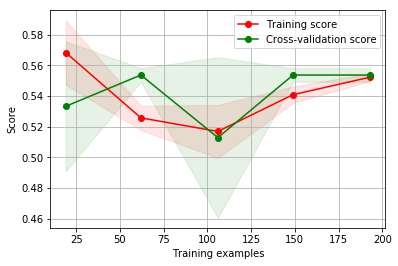

In [210]:
plot_learning_curve(DecisionTreeClassifier(random_state=1, max_depth=0.75), '', X_train, y_train, cv=StratifiedKFold(n_splits=5))

## Вывод:
Из всех рассмотренных алгоритмов: "Stochastic gradient descent", "Support vector machine", "Decision tree", "Gradient boosting", "Random forest". Для модели классификации сердечных заболеваний наиболее эффективным является алгоритм случайного леса, т.е. "Random forest". Как известно Random forest борется с переобучением модели, следовательно можно сделать вывод о том, что датасет является довольно простым и разрозненным, другие методы переобучались, а "Random forest" успешно обошёл эту проблему.